In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#%autoreload # When utils.py is updated
from utils_unet_resunet import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from model.models import Model_3
root_path = 'imgs/' 

In [3]:
# Define data type (L8-Landsat8, S2-Sentinel2, S1-Sentinel1)
img_type = 'FUSION'

if img_type == 'L8':
    # Load images
    ref_2019 = load_tif_image(root_path+'New_Images/References/res_10m/r10m_def_2019.tif').astype('float32') # actual 2019
    opt_2018 = load_tif_image(root_path+'New_Images/Landsat8/'+'cut_land8_2018.tif').astype('float32')   
    opt_2019 = load_tif_image(root_path+'New_Images/Landsat8/'+'cut_land8_2019.tif').astype('float32')

    # Resize images
    opt_2018 = resize_image(opt_2018.copy(), ref_2019.shape[0], ref_2019.shape[1])
    opt_2019 = resize_image(opt_2019.copy(), ref_2019.shape[0], ref_2019.shape[1])  

    # Filter outliers
    opt_2018 = filter_outliers(opt_2018.copy()) 
    opt_2019 = filter_outliers(opt_2019.copy())
    
    image_stack = np.concatenate((opt_2018, opt_2019), axis=-1)
    print('landsat_resize:', image_stack.shape)
    del opt_2018, opt_2019

if img_type == 'S2':
    # Load images
    sent2_2018_1 = load_tif_image(root_path+'New_Images/Sentinel2/'+'2018_10m_b2348.tif').astype('float32')
    #sent2_2018_2 = load_tif_image(root_path+'New_Images/Sentinel2/'+'2018_20m_b5678a1112.tif').astype('float32')
    
    # Resize bands of 20m
    #sent2_2018_2 = resize_image(sent2_2018_2.copy(), sent2_2018_1.shape[0], sent2_2018_1.shape[1])
    #sent2_2018 = np.concatenate((sent2_2018_1, sent2_2018_2), axis=-1)
    sent2_2018 = sent2_2018_1.copy()
    del sent2_2018_1#, sent2_2018_2
    
    sent2_2019_1 = load_tif_image(root_path+'New_Images/Sentinel2/'+'2019_10m_b2348.tif').astype('float32')
    #sent2_2019_2 = load_tif_image(root_path+'New_Images/Sentinel2/'+'2019_20m_b5678a1112.tif').astype('float32')   
    
    # Resize bands of 20m
    #sent2_2019_2 = resize_image(sent2_2019_2.copy(), sent2_2019_1.shape[0], sent2_2019_1.shape[1])
    #sent2_2019 = np.concatenate((sent2_2019_1, sent2_2019_2), axis=-1)
    sent2_2019 = sent2_2019_1.copy()
    del sent2_2019_1#, sent2_2019_2
    
    # Filter outliers
    sent2_2018 = filter_outliers(sent2_2018.copy()) 
    sent2_2019 = filter_outliers(sent2_2019.copy()) 
    
    image_stack = np.concatenate((sent2_2018, sent2_2019), axis=-1)
    print('Image stack:', image_stack.shape)
    del sent2_2018, sent2_2019

if img_type == 'S1':
    # Load images
    sar_2018_vh = np.expand_dims(load_SAR_image(root_path+'New_Images/Sentinel1/'+'cut_sent1_vh_2018.tif').astype('float32'), axis = -1)
    sar_2018_vv = np.expand_dims(load_SAR_image(root_path+'New_Images/Sentinel1/'+'cut_sent1_vv_2018.tif').astype('float32'), axis = -1)
    sar_2019_vh = np.expand_dims(load_SAR_image(root_path+'New_Images/Sentinel1/'+'cut_sent1_vh_2019.tif').astype('float32'), axis = -1)
    sar_2019_vv = np.expand_dims(load_SAR_image(root_path+'New_Images/Sentinel1/'+'cut_sent1_vv_2019.tif').astype('float32'), axis = -1)
    
    sar_2018 = np.concatenate((sar_2018_vh, sar_2018_vv), axis=-1)
    sar_2019 = np.concatenate((sar_2019_vh, sar_2019_vv), axis=-1)
    del sar_2018_vh, sar_2018_vv, sar_2019_vh, sar_2019_vv
    
    # Filter outliers
    sar_2018 = filter_outliers(sar_2018.copy()) 
    sar_2019 = filter_outliers(sar_2019.copy()) 

    image_stack = np.concatenate((sar_2018, sar_2019), axis=-1)
    print('Image stack:', image_stack.shape)
    del sar_2018, sar_2019

if img_type == 'FUSION':
    # Load images
    sent2_2018_1 = load_tif_image(root_path+'New_Images/Sentinel2/'+'2018_10m_b2348.tif').astype('float32')
    #sent2_2018_2 = load_tif_image(root_path+'New_Images/Sentinel2/'+'2018_20m_b5678a1112.tif').astype('float32')
    
    # Resize bands of 20m
    #sent2_2018_2 = resize_image(sent2_2018_2.copy(), sent2_2018_1.shape[0], sent2_2018_1.shape[1])
    #sent2_2018 = np.concatenate((sent2_2018_1, sent2_2018_2), axis=-1)
    sent2_2018 = sent2_2018_1.copy()
    del sent2_2018_1#, sent2_2018_2
    
    sent2_2019_1 = load_tif_image(root_path+'New_Images/Sentinel2/'+'2019_10m_b2348.tif').astype('float32')
    #sent2_2019_2 = load_tif_image(root_path+'New_Images/Sentinel2/'+'2019_20m_b5678a1112.tif').astype('float32')   
    
    # Resize bands of 20m
    #sent2_2019_2 = resize_image(sent2_2019_2.copy(), sent2_2019_1.shape[0], sent2_2019_1.shape[1])
    #sent2_2019 = np.concatenate((sent2_2019_1, sent2_2019_2), axis=-1)
    sent2_2019 = sent2_2019_1.copy()
    del sent2_2019_1#, sent2_2019_2
    
    # Filter outliers
    sent2_2018 = filter_outliers(sent2_2018.copy()) 
    sent2_2019 = filter_outliers(sent2_2019.copy()) 
    
    opt_image_stack = np.concatenate((sent2_2018, sent2_2019), axis=-1)
    print('Image stack:', image_stack.shape)
    

    # Load images
    sar_2018_vh = np.expand_dims(load_SAR_image(root_path+'New_Images/Sentinel1/'+'cut_sent1_vh_2018.tif').astype('float32'), axis = -1)
    sar_2018_vv = np.expand_dims(load_SAR_image(root_path+'New_Images/Sentinel1/'+'cut_sent1_vv_2018.tif').astype('float32'), axis = -1)
    sar_2019_vh = np.expand_dims(load_SAR_image(root_path+'New_Images/Sentinel1/'+'cut_sent1_vh_2019.tif').astype('float32'), axis = -1)
    sar_2019_vv = np.expand_dims(load_SAR_image(root_path+'New_Images/Sentinel1/'+'cut_sent1_vv_2019.tif').astype('float32'), axis = -1)
    
    sar_2018 = np.concatenate((sar_2018_vh, sar_2018_vv), axis=-1)
    sar_2019 = np.concatenate((sar_2019_vh, sar_2019_vv), axis=-1)
    del sar_2018_vh, sar_2018_vv, sar_2019_vh, sar_2019_vv
    
    # Filter outliers
    sar_2018 = filter_outliers(sar_2018.copy()) 
    sar_2019 = filter_outliers(sar_2019.copy()) 

    sar_image_stack = np.concatenate((sar_2018, sar_2019), axis=-1)
    print('Image stack:', image_stack.shape)
    del sar_2018, sar_2019
    del sent2_2018, sent2_2019
    
    image_stack = np.concatenate((opt_image_stack, sar_image_stack), axis=-1)
    

# load references     
# Load current reference 
#ref_2019 = load_tif_image(root_path+'New_Images/References/res_10m/r10m_def_2019.tif').astype('float32') # actual 2019
# Load past references
#past_ref = np.load(root_path+'New_Images/References/past_ref_and_clouds.npy').astype('float32')
#past_ref1 = load_tif_image(root_path+'New_Images/References/res_10m/r10m_def_1988_2007.tif').astype('float32') # 1988_2007
#past_ref2 = load_tif_image(root_path+'New_Images/References/res_10m/r10m_def_2008_2018.tif').astype('float32') # 2008_2018
#clouds_2018 = load_tif_image(root_path+'New_Images/References/cut_b10_2018.tif').astype('float32')
#clouds_2018 = resize_image(np.expand_dims(clouds_2018.copy(), axis = -1), ref_2019.shape[0], ref_2019.shape[1])
#clouds_2018 = binary_mask_cloud(clouds_2018.copy(), 50)
#clouds_2019 = load_tif_image(root_path+'New_Images/References/cut_b10_2019.tif').astype('float32') 
#clouds_2019 = resize_image(np.expand_dims(clouds_2019.copy(), axis = -1), ref_2019.shape[0], ref_2019.shape[1])
#clouds_2019 = binary_mask_cloud(clouds_2019.copy(), 50)

imgs/New_Images/Sentinel2/2018_10m_b2348.tif
imgs/New_Images/Sentinel2/2019_10m_b2348.tif
Image stack: (17729, 9202, 8)


In [4]:
# Create label mask
#past_ref = past_ref1 + past_ref2 + clouds_2018 + clouds_2019
#past_ref[past_ref>=1] = 1
#buffer = 2
#final_mask1 = mask_no_considered(ref_2019, buffer, past_ref)
#del past_ref1, past_ref2, clouds_2018, clouds_2019
final_mask1 = np.load(root_path+'New_Images/ref/'+'labels.npy')

lim_x = 10000
lim_y = 7000
image_stack = image_stack[:lim_x, :lim_y, :]
final_mask1 = final_mask1[:lim_x, :lim_y]
#ref_2019 = ref_2019[:lim_x, :lim_y]

h_, w_, channels = image_stack.shape
print('image stack size: ', image_stack.shape)

# Normalization
type_norm = 1
image_array = normalization(image_stack.copy(), type_norm)
print(np.min(image_array), np.max(image_array))
del image_stack

# Print pertengate of each class (whole image)
print('Total no-deforestaion class is {}'.format(len(final_mask1[final_mask1==0])))
print('Total deforestaion class is {}'.format(len(final_mask1[final_mask1==1])))
print('Total past deforestaion class is {}'.format(len(final_mask1[final_mask1==2])))
print('Percentage of deforestaion class is {:.2f}'.format((len(final_mask1[final_mask1==1])*100)/len(final_mask1[final_mask1==0])))

image stack size:  (10000, 7000, 8)
-4.987141 5.626766
Total no-deforestaion class is 36326397
Total deforestaion class is 1048775
Total past deforestaion class is 32624828
Percentage of deforestaion class is 2.89


In [5]:
# Create tile mask
mask_tiles = create_mask(final_mask1.shape[0], final_mask1.shape[1], grid_size=(5, 4))
image_array = image_array[:mask_tiles.shape[0], :mask_tiles.shape[1],:]
final_mask1 = final_mask1[:mask_tiles.shape[0], :mask_tiles.shape[1]]

print('mask: ',mask_tiles.shape)
print('image stack: ', image_array.shape)
print('ref :', final_mask1.shape)
#plt.imshow(mask_tiles)

Tiles size:  2000 1750
Mask size:  (10000, 7000)
mask:  (10000, 7000)
image stack:  (10000, 7000, 8)
ref : (10000, 7000)


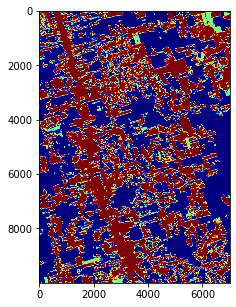

In [6]:
plt.figure(figsize=(10,5))
plt.imshow(final_mask1, cmap = 'jet')

In [7]:
# Define tiles for training, validation, and test sets
tiles_tr = [1,3,5,8,11,13,14,20]
tiles_val = [6,19]
tiles_ts = (list(set(np.arange(20)+1)-set(tiles_tr)-set(tiles_val)))

mask_tr_val = np.zeros((mask_tiles.shape)).astype('float32')
# Training and validation mask
for tr_ in tiles_tr:
    mask_tr_val[mask_tiles == tr_] = 1

for val_ in tiles_val:
    mask_tr_val[mask_tiles == val_] = 2

mask_amazon_ts = np.zeros((mask_tiles.shape)).astype('float32')
for ts_ in tiles_ts:
    mask_amazon_ts[mask_tiles == ts_] = 1

In [8]:
# Create ixd image to extract patches
overlap = 0.7
patch_size = 128
batch_size = 32
im_idx = create_idx_image(final_mask1)
patches_idx = extract_patches(im_idx, patch_size=(patch_size, patch_size), overlap=overlap).reshape(-1,patch_size, patch_size)
patches_mask = extract_patches(mask_tr_val, patch_size=(patch_size, patch_size), overlap=overlap).reshape(-1, patch_size, patch_size)
del im_idx

In [9]:
# Selecting index trn val and test patches idx
idx_trn = np.squeeze(np.where(patches_mask.sum(axis=(1, 2))==patch_size**2))
idx_val = np.squeeze(np.where(patches_mask.sum(axis=(1, 2))==2*patch_size**2))
del patches_mask

patches_idx_trn = patches_idx[idx_trn]
patches_idx_val = patches_idx[idx_val]
del idx_trn, idx_val

print('Number of training patches:  ', len(patches_idx_trn), 'Number of validation patches', len(patches_idx_val))

Number of training patches:   17110 Number of validation patches 4116


In [10]:
# Extract patches with at least 2% of deforestation class
X_train = retrieve_idx_percentage(final_mask1, patches_idx_trn, patch_size, pertentage = 2)
X_valid = retrieve_idx_percentage(final_mask1, patches_idx_val, patch_size, pertentage = 2)
print(X_train.shape, X_valid.shape)
del patches_idx_trn, patches_idx_val

(1158, 128, 128) (341, 128, 128)


In [11]:
def batch_generator(batches, image, reference, target_size, number_class):
    """Take as input a Keras ImageGen (Iterator) and generate random
    crops from the image batches generated by the original iterator.
    """
    image = image.reshape(-1, image.shape[-1])
    reference = reference.reshape(final_mask1.shape[0]*final_mask1.shape[1])
    while True:
        batch_x, batch_y = next(batches)
        batch_x = np.squeeze(batch_x.astype('int64'))
        #print(batch_x.shape)
        batch_img = np.zeros((batch_x.shape[0], target_size, target_size, image.shape[-1]))
        batch_ref = np.zeros((batch_x.shape[0], target_size, target_size, number_class))
        
        for i in range(batch_x.shape[0]):
            if np.random.rand()>0.5:
                batch_x[i] = np.rot90(batch_x[i], 1)
            batch_img[i] = image[batch_x[i]] 
            batch_ref[i] = tf.keras.utils.to_categorical(reference[batch_x[i]] , number_class)
                       
        yield (batch_img, batch_ref)

train_datagen = ImageDataGenerator(horizontal_flip = True,
                                   vertical_flip = True)
valid_datagen = ImageDataGenerator(horizontal_flip = True, 
                                   vertical_flip = True)

y_train = np.zeros((len(X_train)))
y_valid = np.zeros((len(X_valid)))

train_gen = train_datagen.flow(np.expand_dims(X_train, axis = -1), y_train,
                              batch_size=batch_size,
                              shuffle=True)

valid_gen = valid_datagen.flow(np.expand_dims(X_valid, axis = -1), y_valid,
                              batch_size=batch_size,
                              shuffle=False)

number_class = 3
train_gen_crops = batch_generator(train_gen, image_array, final_mask1, patch_size, number_class)
valid_gen_crops = batch_generator(valid_gen, image_array, final_mask1, patch_size, number_class)


In [12]:
exp = 1
path_exp = root_path+'experiments/exp'+str(exp)
path_models = path_exp+'/models'
path_maps = path_exp+'/pred_maps'

if not os.path.exists(path_exp):
    os.makedirs(path_exp)   
if not os.path.exists(path_models):
    os.makedirs(path_models)   
if not os.path.exists(path_maps):
    os.makedirs(path_maps)

In [13]:
# Define model
input_shape = (patch_size, patch_size, channels)
nb_filters = [32, 64, 128]

method = 'unet'
if method == 'unet':
   model = build_unet(input_shape, nb_filters, number_class)

if method == 'resunet':
   model = build_resunet(input_shape, nb_filters, number_class)

model = Model_3(nb_filters, number_class)

In [14]:
# Parameters of the model
weights = [0.2, 0.8, 0]
adam = Adam(lr = 1e-3 , beta_1=0.9)
loss = weighted_categorical_crossentropy(weights)

In [15]:
metrics_all = []
times=5
for tm in range(0,times):
    print('time: ', tm)

    rows = patch_size
    cols = patch_size
    adam = Adam(lr = 1e-3 , beta_1=0.9)
    
    loss = weighted_categorical_crossentropy(weights)

    #if method == 'unet':
    #   model = build_unet(input_shape, nb_filters, number_class)

    #if method == 'resunet':
    #   model = build_resunet(input_shape, nb_filters, number_class)
    
    model = Model_3(nb_filters, number_class)
    model.build((None,)+input_shape)
    
    model.compile(optimizer=adam, loss=loss, metrics=['accuracy'])
    model.summary()

    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, mode='min')
    #earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, mode='min') ---- val_accuracy
    #checkpoint = ModelCheckpoint(path_models+ '/' + method +'_'+str(tm)+'.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    checkpoint = ModelCheckpoint(path_models+ '/' + method +'_'+str(tm)+'.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True, mode='min')
    lr_reduce = ReduceLROnPlateau(factor=0.9, min_delta=0.0001, patience=5, verbose=1)
    callbacks_list = [earlystop, checkpoint]
    # train the model
    start_training = time.time()
    history = model.fit(train_gen_crops,
                              steps_per_epoch=len(X_train)*3//train_gen.batch_size,
                              validation_data=valid_gen_crops,
                              validation_steps=len(X_valid)*3//valid_gen.batch_size,
                              epochs=100,
                              callbacks=callbacks_list)
    end_training = time.time() - start_training
    metrics_all.append(end_training)
    del model, history

time:  0
Model: "model_3_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
unet__encoder_1 (UNET_Encode multiple                  537440    
_________________________________________________________________
unet__decoder_1 (UNET_Decode multiple                  332195    
Total params: 869,635
Trainable params: 869,635
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
108/108 [==============================] - 10s 59ms/step - loss: 0.0926 - accuracy: 0.7666 - val_loss: 0.1137 - val_accuracy: 0.7693

Epoch 00001: val_loss improved from inf to 0.11367, saving model to imgs/experiments/exp1/models\unet_0.h5
Epoch 2/100
108/108 [==============================] - 5s 46ms/step - loss: 0.0650 - accuracy: 0.8265 - val_loss: 0.1313 - val_accuracy: 0.7733

Epoch 00002: val_loss did not improve from 0.11367
Epoch 3/100
108/108 [==============================] - 


Epoch 00006: val_loss did not improve from 0.08828
Epoch 7/100
108/108 [==============================] - 7s 62ms/step - loss: 0.0458 - accuracy: 0.8614 - val_loss: 0.1261 - val_accuracy: 0.7895

Epoch 00007: val_loss did not improve from 0.08828
Epoch 8/100
108/108 [==============================] - 7s 61ms/step - loss: 0.0422 - accuracy: 0.8678 - val_loss: 0.1426 - val_accuracy: 0.7925ccuracy

Epoch 00008: val_loss did not improve from 0.08828
Epoch 9/100
108/108 [==============================] - 7s 62ms/step - loss: 0.0381 - accuracy: 0.8767 - val_loss: 0.1645 - val_accuracy: 0.7889

Epoch 00009: val_loss did not improve from 0.08828
Epoch 10/100
108/108 [==============================] - 7s 64ms/step - loss: 0.0355 - accuracy: 0.8825 - val_loss: 0.1868 - val_accuracy: 0.7945

Epoch 00010: val_loss did not improve from 0.08828
Epoch 11/100
108/108 [==============================] - 7s 62ms/step - loss: 0.0334 - accuracy: 0.8868 - val_loss: 0.1811 - val_accuracy: 0.7832

Epoch 0001

In [16]:
# Test loop
time_ts = []
n_pool = 3
n_rows = 5
n_cols = 4
rows, cols = image_array.shape[:2]
pad_rows = rows - np.ceil(rows/(n_rows*2**n_pool))*n_rows*2**n_pool
pad_cols = cols - np.ceil(cols/(n_cols*2**n_pool))*n_cols*2**n_pool
print(pad_rows, pad_cols)

npad = ((0, int(abs(pad_rows))), (0, int(abs(pad_cols))), (0, 0))
image1_pad = np.pad(image_array, pad_width=npad, mode='reflect')

h, w, c = image1_pad.shape
patch_size_rows = h//n_rows
patch_size_cols = w//n_cols
num_patches_x = int(h/patch_size_rows)
num_patches_y = int(w/patch_size_cols)

input_shape=(patch_size_rows,patch_size_cols, c)

#if method == 'unet':
#   new_model = build_unet(input_shape, nb_filters, number_class)

#if method == 'resunet':
#   new_model = build_resunet(input_shape, nb_filters, number_class)

new_model = Model_3(nb_filters, number_class)
new_model.build((None,)+input_shape)

for tm in range(0,times):
    print('time: ', tm)
    #model = load_model(path_models+ '/' + method +'_'+str(tm)+'.h5', compile=False)
    
    #for l in range(1, len(model.layers)):
    #    new_model.layers[l].set_weights(model.layers[l].get_weights())
    new_model.load_weights(path_models+ '/' + method +'_'+str(tm)+'.h5')
    
    start_test = time.time()
    patch_t = []
    
    for i in range(0,num_patches_y):
        for j in range(0,num_patches_x):
            patch = image1_pad[patch_size_rows*j:patch_size_rows*(j+1), patch_size_cols*i:patch_size_cols*(i+1), :]
            predictions_ = new_model.predict(np.expand_dims(patch, axis=0))
            del patch 
            patch_t.append(predictions_[:,:,:,1])
            del predictions_
    end_test =  time.time() - start_test
    patches_pred = np.asarray(patch_t).astype(np.float32)

    prob_recontructed = pred_reconctruct(h, w, num_patches_x, num_patches_y, patch_size_rows, patch_size_cols, patches_pred)
    np.save(path_maps+'/'+'prob_'+str(tm)+'.npy',prob_recontructed) 

    time_ts.append(end_test)
    del prob_recontructed, patches_pred
    #del model
time_ts_array = np.asarray(time_ts)
# Save test time
np.save(path_exp+'/metrics_ts.npy', time_ts_array)


0.0 -8.0
time:  0
time:  1
time:  2
time:  3
time:  4


In [17]:
# Compute mean of the tm predictions maps
prob_rec = np.zeros((image1_pad.shape[0],image1_pad.shape[1], times))

for tm in range (0, times):
    print(tm)
    prob_rec[:,:,tm] = np.load(path_maps+'/'+'prob_'+str(tm)+'.npy').astype(np.float32)

mean_prob = np.mean(prob_rec, axis = -1)
np.save(path_maps+'/prob_mean.npy', mean_prob)

0
1
2
3
4


(-0.5, 6999.5, 9999.5, -0.5)

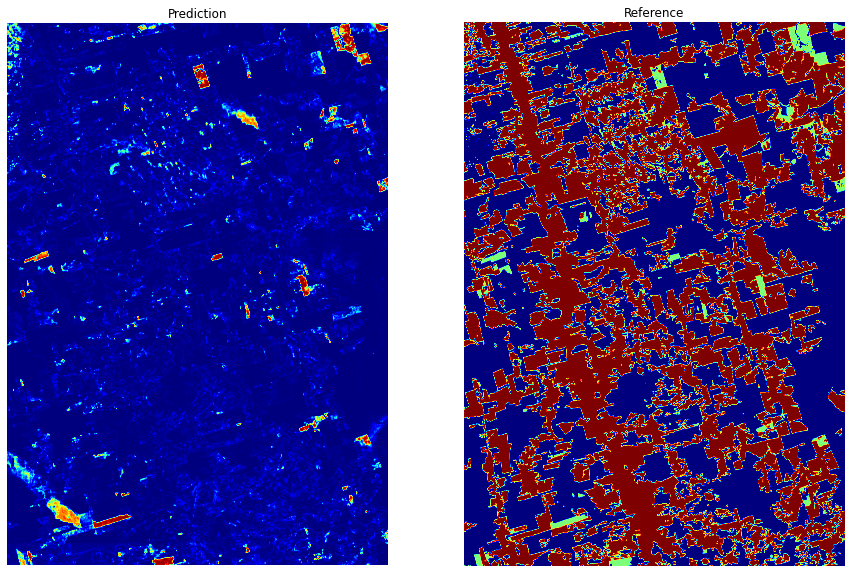

In [18]:
# Plot mean map and reference
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(121)
plt.title('Prediction')
ax1.imshow(mean_prob, cmap ='jet')
ax1.axis('off')

ax2 = fig.add_subplot(122)
plt.title('Reference')
ax2.imshow(final_mask1, cmap ='jet')
ax2.axis('off')

In [19]:
# Computing metrics
mean_prob = mean_prob[:final_mask1.shape[0], :final_mask1.shape[1]]
ref1 = np.ones_like(final_mask1).astype(np.float32)

ref1 [final_mask1 == 2] = 0
TileMask = mask_amazon_ts * ref1
GTTruePositives = final_mask1==1
    
Npoints = 10
Pmax = np.max(mean_prob[GTTruePositives * TileMask ==1])
ProbList = np.linspace(Pmax,0,Npoints)
    
metrics_ = matrics_AA_recall(ProbList, mean_prob, final_mask1, mask_amazon_ts, 625)
np.save(path_exp+'/acc_metrics.npy',metrics_)

0.9953177213668823


D:\Ferrari\proj_1\projeto\utils_unet_resunet.py:200: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_ = TP/(TP+FP)


0.8847268634372287
0.7741360055075752
0.6635451475779216
0.552954289648268
0.44236343171861436
0.33177257378896086
0.22118171585930724
0.11059085792965362
0.0


In [20]:
# Complete NaN values
metrics_copy = metrics_.copy()
metrics_copy = complete_nan_values(metrics_copy)

mAP 0.9086579721854267


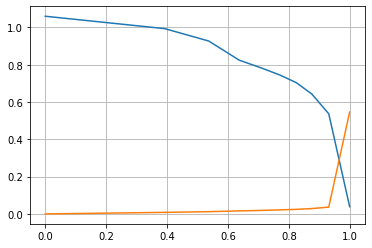

In [21]:
# Comput Mean Average Precision (mAP) score 
Recall = metrics_copy[:,0]
Precision = metrics_copy[:,1]
AA = metrics_copy[:,2]
    
DeltaR = Recall[1:]-Recall[:-1]
AP = np.sum(Precision[:-1]*DeltaR)
print('mAP', AP)

# Plot Recall vs. Precision curve
plt.close('all')
plt.plot(metrics_copy[:,0],metrics_copy[:,1])
plt.plot(metrics_copy[:,0],metrics_copy[:,2])
plt.grid()